# **04 - Modelling**

## Objectives

* Answer Business requirement 1:
  * The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train

## Outputs

* Avarage and variability of images per label plot.
* Plot to distinguish the contrast between healthy cherry leaves from leaves with powdery mildew.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No additional comments. 



---

# Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

---

# Set Data directory variables

## Change working directory

* Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

* The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [3]:
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Input directory variables

In [4]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_data_dir = data_dir + '/train'
val_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

## Output directory variables

In [5]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(version_index):
    while True:
        try:
            os.makedirs(name=f'outputs/Version{version_index}')
            return f'outputs/Version{version_index}'
        except:
            version_index += 1
version_output = create_output_dir(1)
print(f'Current output folder is {version_output}')

Current output folder is outputs/Version1


## Data label names variables

In [6]:
labels = os.listdir(train_data_dir)
print(f'Datalabels are {labels}')

Datalabels are ['healthy', 'powdery_mildew']


## Set image shape

* As seen in notebook "01 - DataCollection" all images are 256 X 256 pixels 

* To control model performance/model size this model_shape variable might need to be set based on trial and error.

In [7]:
#As images are squares (checked in data collection notebook), we set only one variable to control both height and width
height_width = 100
#channel value set to 3 corresponding with RGB
channels = 3

img_shape = (height_width, height_width, channels)
img_shape

(100, 100, 3)

---

# Augment data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-10 18:55:52.642563: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 18:55:53.203648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 18:55:53.207799: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 18:55:55.877418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
augment_training_data = ImageDataGenerator(rotation_range=90,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

In [10]:
batch_size = 20  # Set batch size
augmented_training_data = augment_training_data.flow_from_directory(train_data_dir,
                                                     target_size=img_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

augmented_training_data.class_indices

Found 2948 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

(20, 100, 100, 3)


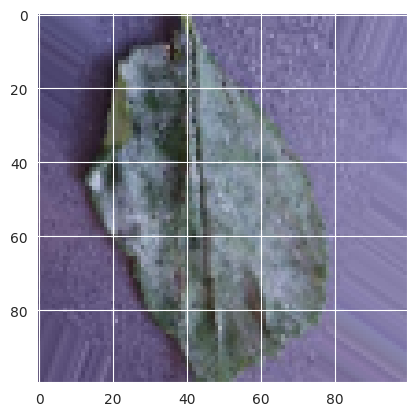

(20, 100, 100, 3)


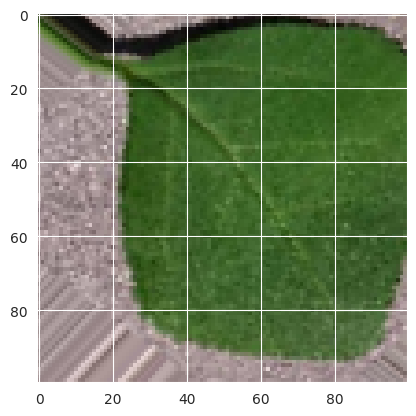

(20, 100, 100, 3)


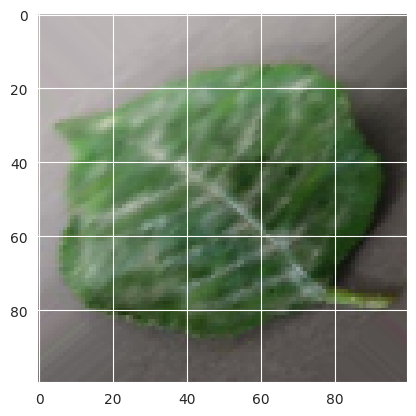

In [11]:
for _ in range(3):
    img, label = augmented_training_data.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

---

# Conclusions and Next Steps

* Dataset is collected from Kaggle and stored in inputs folder.
* No input data is pushed to github repo
* Next step is data visualization found in 02 - DataVisualization notebook